### Monte Carlo: Prevendo o Preço de Ações

In [7]:
# Carregando as Bibliotecas necessárias:
import numpy as np
import pandas as pd
import pandas_datareader.data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [8]:
# Carregando o historico da ação:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2002-1-1')['Adj Close']

data.tail()

,PG
Date,
2022-09-21,135.729996
2022-09-22,136.210007
2022-09-23,135.580002
2022-09-26,135.710007
2022-09-27,132.750000


In [9]:
# Calculando os retornos diários da ação:
log_returns = np.log(1+data.pct_change())

log_returns.tail()

,PG
Date,
2022-09-21,-0.012956
2022-09-22,0.003530
2022-09-23,-0.004636
2022-09-26,0.000958
2022-09-27,-0.022053


<AxesSubplot: xlabel='Date'>

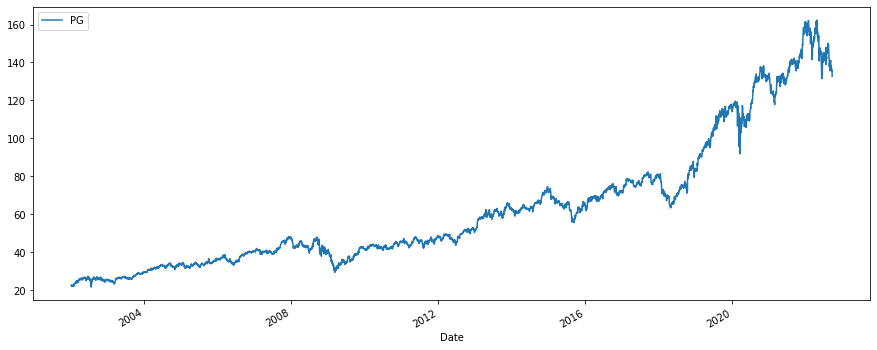

In [10]:
# Gerando um Gráfico com o histórico da ação:
data.plot(figsize=(15,6))

<AxesSubplot: xlabel='Date'>

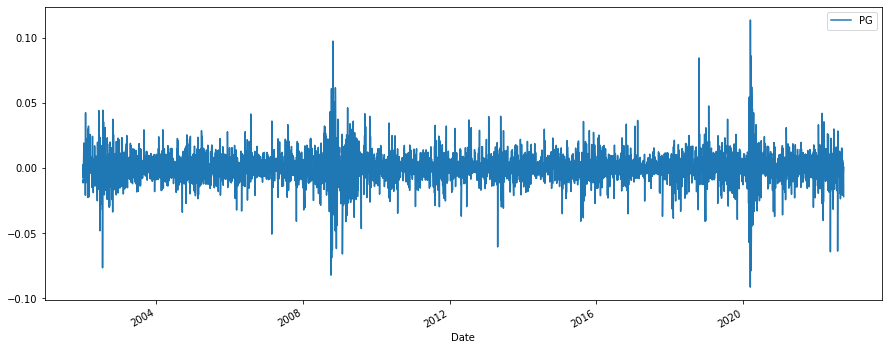

In [11]:
# Gerando um Gráfico com os retornos diários da Ação:
log_returns.plot(figsize=(15,6))

Calculando o Movimento Browniano:

In [12]:
# Calculo da Media dos Retornos:
med = log_returns.mean()

med

PG    0.000337
dtype: float64

In [13]:
# Calculo da Variancia dos Retornos:
var = log_returns.var()

var

PG    0.000133
dtype: float64

In [14]:
# Calculo do Drift:
drift = med - (0.5 * var)

drift

PG    0.000271
dtype: float64

In [15]:
# Calculo do Desvio-padrão dos retornos diários:
stdev = log_returns.std()

stdev

PG    0.011525
dtype: float64

In [16]:
type(drift)

pandas.core.series.Series

In [17]:
type(stdev)

pandas.core.series.Series

In [19]:
# Calculo da Distancia entre um evento com 95% de chances de ocorrer e a média:
norm.ppf(0.95)

1.6448536269514722

In [20]:
# Gerando uma matriz de números aleatórios:
x = np.random.rand(10,2) # gerará uma matriz 10 x 2

x

array([[0.97001541, 0.94110014],
       [0.2124692 , 0.77614233],
       [0.62494534, 0.57448527],
       [0.25677949, 0.14126168],
       [0.60664104, 0.41605485],
       [0.05529532, 0.18603045],
       [0.38791212, 0.17012677],
       [0.39892984, 0.89875616],
       [0.90713538, 0.03116621],
       [0.66967194, 0.12345835]])

In [21]:
# Gerando a distância da media para cada numero aleatorio gerado:
norm.ppf(x)

array([[ 1.88102008,  1.56407597],
       [-0.797883  ,  0.75922942],
       [ 0.31849523,  0.18780508],
       [-0.65330607, -1.07466806],
       [ 0.27057502, -0.21199659],
       [-1.59554398, -0.89261962],
       [-0.28476494, -0.95366441],
       [-0.25611806,  1.27449605],
       [ 1.32331923, -1.86392364],
       [ 0.43900748, -1.15787098]])

In [22]:
# Calculo da Variavel Aleatoria Z:
z = norm.ppf(np.random.rand(10,2))

z

array([[-0.4363841 ,  0.2948369 ],
       [ 0.45066742,  0.5964744 ],
       [-2.01209916,  0.29876181],
       [ 0.29330373, -1.43833939],
       [ 0.81099581, -1.17913712],
       [ 1.0801857 ,  0.90399924],
       [ 0.96699348, -0.19887665],
       [ 0.25443077,  1.09752831],
       [-0.05191243,  0.7416202 ],
       [ 1.21852951,  0.67545367]])

In [23]:
# Calculando os Retornos Diários Simulados para os próximos 1000 dias:
t_intervals = 1000 # numero de intervalos de tempo - dias/linhas da matriz
iterations = 10 # numero de series de previsoes futuras/colunas da matriz

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals,iterations))) # series de retornos simulados

daily_returns

array([[1.00727036, 1.03337274, 0.99823716, ..., 1.00057662, 1.01390379,
        1.03132903],
       [0.99753244, 0.99843274, 1.01550178, ..., 0.9930868 , 1.00381035,
        0.99210655],
       [1.02133477, 0.99787144, 0.99654933, ..., 0.99058901, 0.98693558,
        1.00345882],
       ...,
       [0.98954104, 1.01768379, 0.98270013, ..., 1.00524007, 1.00833951,
        1.00493421],
       [0.98836247, 1.0037093 , 1.00696276, ..., 1.01653655, 0.9946228 ,
        1.00237532],
       [1.00844359, 0.98584853, 1.01383323, ..., 0.98578718, 0.980828  ,
        1.01085199]])

Gerando uma Tabela de Preços Esperados:

In [24]:
# Definindo o Preço Inicial:
s0 = data.iloc[-1] # último preço da ação obtido do conjunto de dados inicial

s0

PG    132.75
Name: 2022-09-27 00:00:00, dtype: float64

In [25]:
# Gerando um novo array com as mesmas dimensões da matriz de retornos diários gerada:
price_list = np.zeros_like(daily_returns)
# np.zeros_like() - gera um array com as mesmas dimensões da matriz e o preenche com zeros

price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
# Definindo o preço inicial da lista com o preço do dia anterior - último valor real obtido(s0):
price_list[0] = s0

price_list

array([[132.75, 132.75, 132.75, ..., 132.75, 132.75, 132.75],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       ...,
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ]])

In [27]:
# Gerando a Lista de Preços Esperados
for t in range(1,t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]
    
price_list

array([[132.75      , 132.75      , 132.75      , ..., 132.75      ,
        132.75      , 132.75      ],
       [132.42243192, 132.54194612, 134.80786073, ..., 131.83227254,
        133.25582417, 131.70214451],
       [135.24763464, 132.25982266, 134.34268394, ..., 130.5916001 ,
        131.51491435, 132.15767815],
       ...,
       [183.72566171, 212.40295406, 204.25025533, ..., 149.10184395,
        225.69484299, 185.80623663],
       [181.58754826, 213.1908208 , 205.67240129, ..., 151.56747395,
        224.48123665, 186.24758504],
       [183.12079918, 210.17385722, 208.51751427, ..., 149.41327236,
        220.17748187, 188.26874194]])

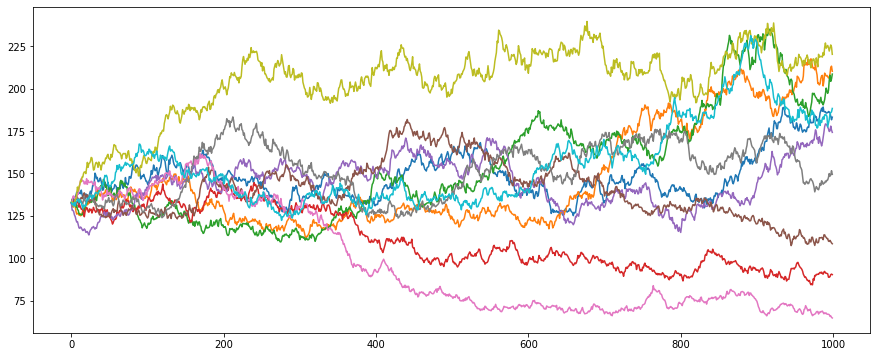

In [28]:
# Plotando um Gráfico com os Preços da Ação Simulados:
plt.figure(figsize=(15,6))
plt.plot(price_list)